## Data Analysis with Python

#### Afroza, Agricultural Researcher, BARI, Gazipur, Bangladesh
###### Objectives:

######    EDA using groupby/pivot_table and barplot (total 9 barplots), based on model, transmission, and fuelType
        A. What are the top 5 selling car models in the dataset?
        B. What's the average selling price of the top 5 selling car models?
        C. What's the total sale of the top 5 selling car models?

Data Source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw


In [48]:
import numpy as np 
import pandas as pd 
import os as os

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [49]:
os.chdir(r'E:\EMK Data Analysis')
os.getcwd()

'E:\\EMK data analysis'

##### Importing data

In [50]:
# reading an csv file
df = pd.read_csv("audi.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0



##### Creating groupby table

In [51]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


In [52]:
df_agg = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


In [53]:
df_agg = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


In [54]:
# sort the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# remove the 'count' column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


##### Creating pivot table

In [55]:
df_pivot_model = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot_model)

,count,mean,sum
,price,price,price
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858


In [56]:
df_pivot_transmission = pd.pivot_table(df, index='transmission', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot_transmission)

,count,mean,sum
,price,price,price
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


In [57]:
df_pivot_fuelType = pd.pivot_table(df, index='fuelType', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot_fuelType)

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


##### Data processing before visualization

In [58]:
# Data processing based on model

# sort the dataframe based on the column 'count'
df_pivot_model = df_pivot_model.sort_values(by=('count', 'price'), ascending=False)

# create a new column percentage of the cars in each model
df_pivot_model['percent_of_cars'] = (df_pivot_model['count']/df_pivot_model['count'].sum())*100

# convert the 'sum' column in millions
df_pivot_model['sum'] = df_pivot_model['sum']/1000000

# keep up to two decimal points
df_pivot_model = df_pivot_model.round(2)

# remove the 'count' column
df_pivot_model = df_pivot_model.drop('count', axis=1)

In [59]:
# Data processing based on transmission

# sort the dataframe based on the column 'count'
df_pivot_transmission = df_pivot_transmission.sort_values(by=('count', 'price'), ascending=False)

# create a new column percentage of the cars in each model
df_pivot_transmission['percent_of_cars'] = (df_pivot_transmission['count']/df_pivot_transmission['count'].sum())*100

# convert the 'sum' column in millions
df_pivot_transmission['sum'] = df_pivot_transmission['sum']/1000000

# keep up to two decimal points
df_pivot_transmission = df_pivot_transmission.round(2)

# remove the 'count' column
df_pivot_transmission = df_pivot_transmission.drop('count', axis=1)

In [60]:
# Data processing based on fuelType

# sort the dataframe based on the column 'count'
df_pivot_fuelType = df_pivot_fuelType.sort_values(by=('count', 'price'), ascending=False)

# create a new column percentage of the cars in each model
df_pivot_fuelType['percent_of_cars'] = (df_pivot_fuelType['count']/df_pivot_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_pivot_fuelType['sum'] = df_pivot_fuelType['sum']/1000000

# keep up to two decimal points
df_pivot_fuelType = df_pivot_fuelType.round(2)

# remove the 'count' column
df_pivot_fuelType = df_pivot_fuelType.drop('count', axis=1)

##### A. What are the top 5 selling car models in the dataset?
##### B. What's the average selling price of the top 5 selling car models?
##### C. What's the total sale of the top 5 selling car models?

##### Data visualization using barplot

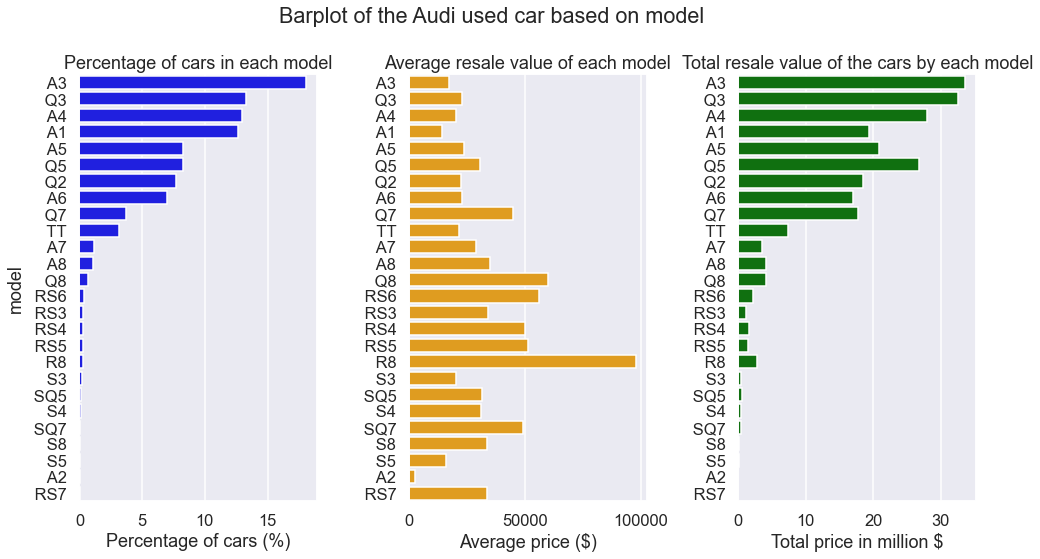

In [61]:
plt.figure(figsize=(14,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_pivot_model.index, data=df_pivot_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x=('mean', 'price'), y=df_pivot_model.index, data=df_pivot_model, orient='h', color='orange')
plt.title("Average resale value of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x=('sum', 'price'), y=df_pivot_model.index, data=df_pivot_model, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car based on model")
plt.tight_layout()
plt.show()



 ##### 1. A3, Q3, A4, A1 and A5 are the top 5 selling car models in the dataset
 ##### 2. R8 model car has the highest price on average in the dataset
 ##### 3. A3 model car has the highest resale value among all the models



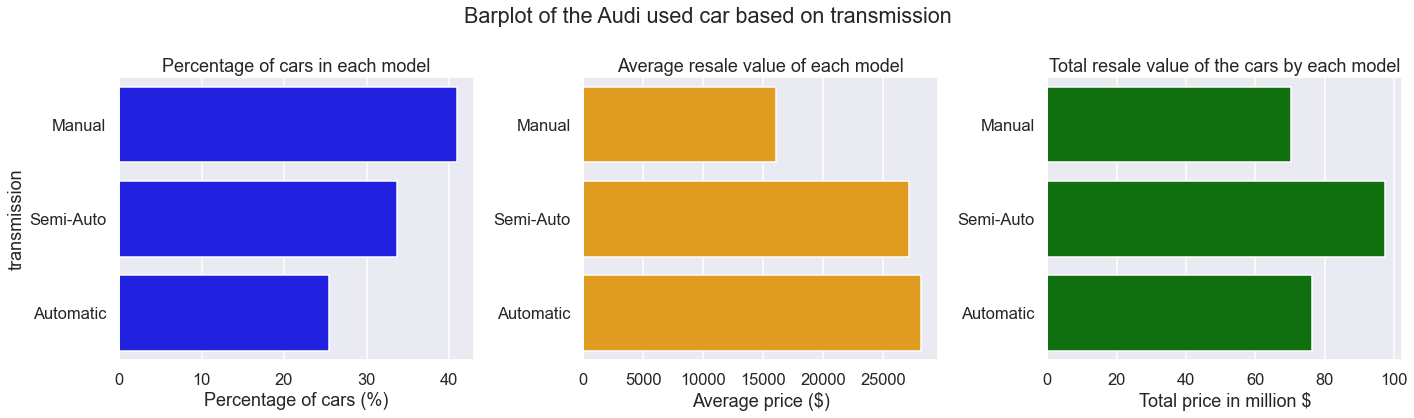

In [62]:
plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_pivot_transmission.index, data=df_pivot_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x=('mean', 'price'), y=df_pivot_transmission.index, data=df_pivot_transmission, orient='h', color='orange')
plt.title("Average resale value of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x=('sum', 'price'), y=df_pivot_transmission.index, data=df_pivot_transmission, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car based on transmission")
plt.tight_layout()
plt.show()



##### 1. Manual type transmissions are highly used.
##### 2. On average automatic type cars have high price 
##### 3. Semi-Auto cars are the highest in total resell price 



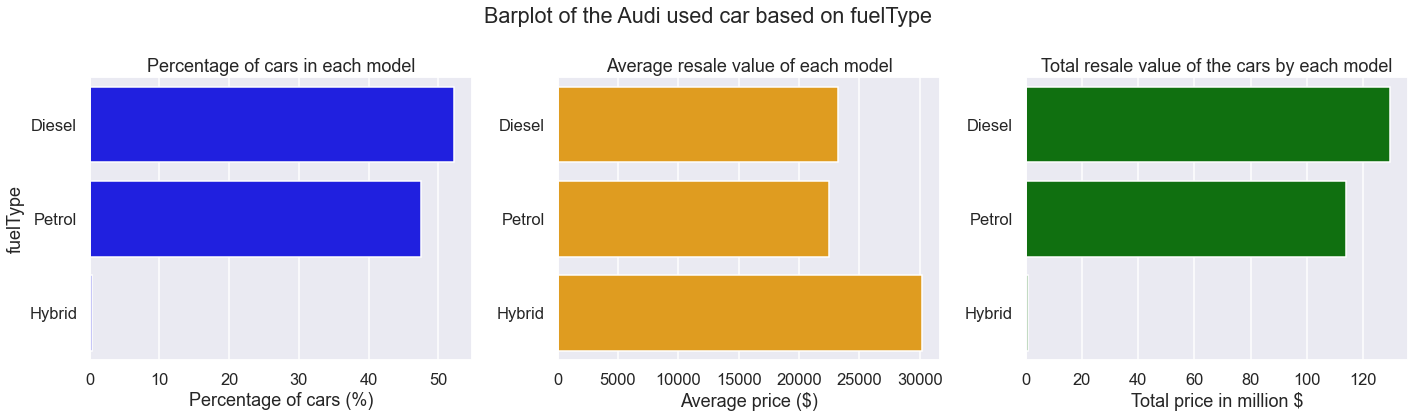

In [63]:
plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_pivot_fuelType.index, data=df_pivot_fuelType, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x=('mean', 'price'), y=df_pivot_fuelType.index, data=df_pivot_fuelType, orient='h', color='orange')
plt.title("Average resale value of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x=('sum', 'price'), y=df_pivot_fuelType.index, data=df_pivot_fuelType, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car based on fuelType")
plt.tight_layout()
plt.show()



   ##### 1.Percentage of diesel type car is higher than petrol and hybrid type cars 
   ##### 2.Average resale value of hybrid car is higher than diesel and petrol type cars
   ##### 3.Total resale value of diesel type car is highest

### This is the end of Homework 3
